In [ ]:
#### Bank credit scoring - classification model 

In [ ]:
# The objective of the bank credit scoring classification problem is to develop a predictive model that assesses
# the creditworthiness of loan applicants based on various financial and personal attributes. The goal is to accurately 
# classify applicants into distinct risk categories (e.g., "Approved" or "Rejected") in order
#  to minimize the risk of default and optimize the lending process.

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("C:\\Users\\RAJESH KUMAR\\Documents\\bank dataset\\bank.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
### outliers treatment

In [6]:
numeric_columns = ['age','balance','day','duration','campaign','pdays','previous']

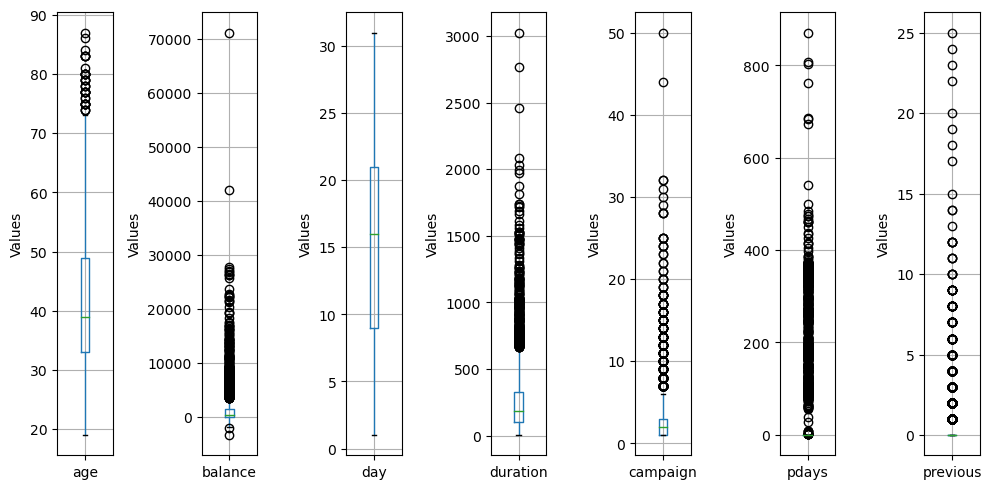

In [9]:
# Create boxplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(10, 5))

for i, column in enumerate(numeric_columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [10]:
selected_columns = ['age','balance','duration','campaign','pdays','previous']

In [11]:
# Define a function to treat outliers using percentiles
def treat_outliers_percentile(column, lower_percentile=0.25, upper_percentile=0.75):
    q1 = column.quantile(lower_percentile)
    q3 = column.quantile(upper_percentile)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = np.where(column < lower_bound, q1, column)
    column = np.where(column > upper_bound, q3, column)
    return column

In [12]:
# Treat outliers in selected columns using percentiles
for column in selected_columns:
    data[column] = treat_outliers_percentile(data[column])

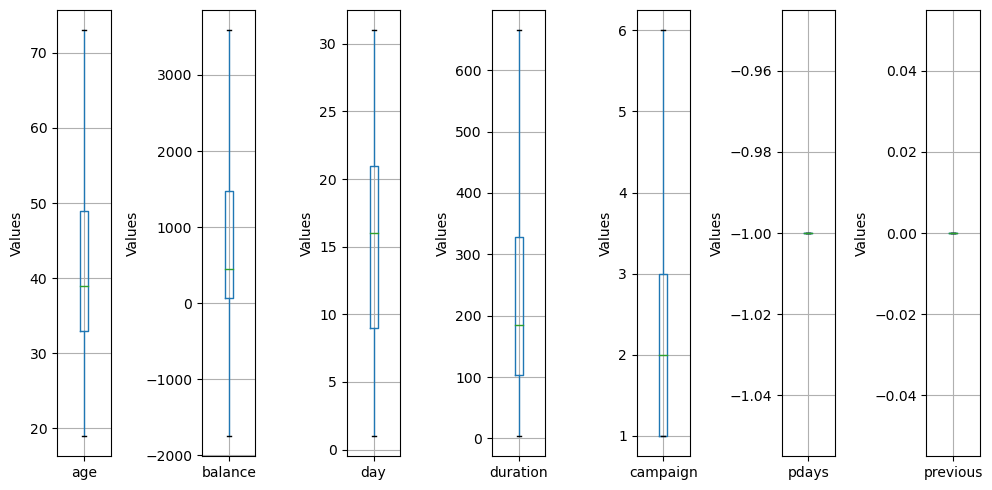

In [13]:
# Create boxplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(10, 5))

for i, column in enumerate(numeric_columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [ ]:
## visualizations 

<Axes: xlabel='marital', ylabel='count'>

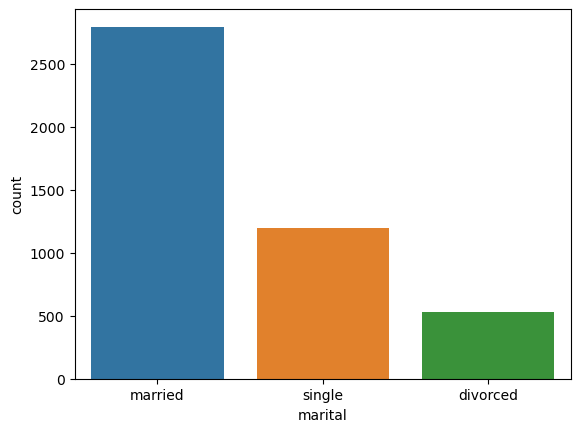

In [20]:
sns.countplot(x='marital',data=data)

<Axes: xlabel='poutcome', ylabel='count'>

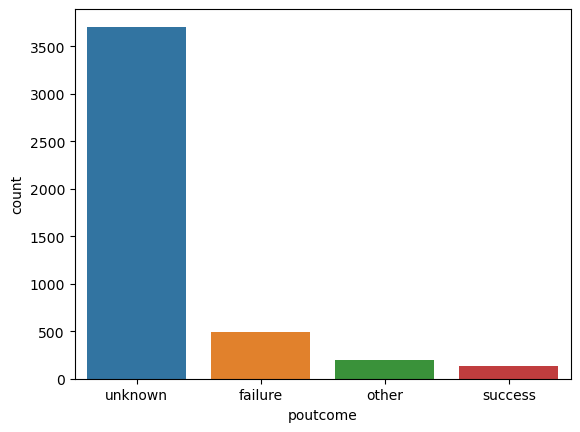

In [21]:
sns.countplot(x='poutcome',data=data)

<Axes: xlabel='housing', ylabel='count'>

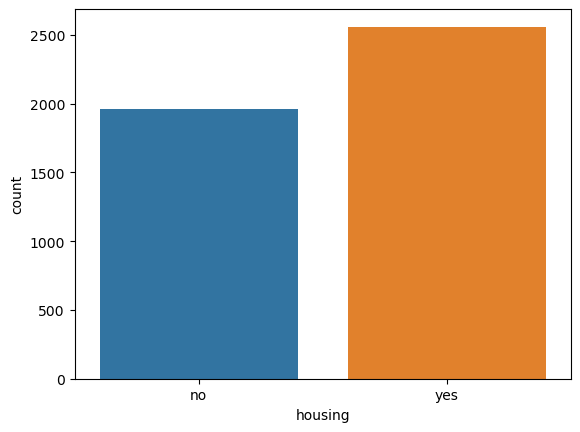

In [22]:
sns.countplot(x='housing',data=data)

In [ ]:
## convert categorical columns to encoded values

In [33]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['job','marital','education','default','housing','loan','month','poutcome'])

In [29]:
from sklearn.model_selection import train_test_split

In [35]:
# Splitting data into Independent and Dependent Variable
X = data.drop('y', axis=1)
y = data['y']

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [37]:
# model 1: decision tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score, classification_report

In [42]:
# Initialize and train the decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
# Predict quality labels
y_pred = model.predict(X_test)


In [44]:
# Generate a classification report
report = classification_report(y_test, y_pred)

In [58]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [59]:
print(f'Decision Tree Accuracy: {accuracy_rf * 100:.2f}%')
report_dt = classification_report(y_test, y_pred)
print('Decision Tree Classification Report:')
print(report_dt)

Decision Tree Accuracy: 88.62%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       793
           1       0.44      0.41      0.43       112

    accuracy                           0.86       905
   macro avg       0.68      0.67      0.67       905
weighted avg       0.86      0.86      0.86       905



In [60]:
#### model 2 : random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
y_pred_rf = random_forest_model.predict(X_test)

In [64]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [65]:
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
report_rf = classification_report(y_test, y_pred_rf)
print('Random Forest Classification Report:')
print(report_rf)

Random Forest Accuracy: 88.51%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       793
           1       0.61      0.20      0.30       112

    accuracy                           0.89       905
   macro avg       0.75      0.59      0.62       905
weighted avg       0.86      0.89      0.86       905



In [83]:
# Predicting Test Set Results
y_pred = model.predict(X_test)
y_pred = np.round_(y_pred, decimals = 2)

In [84]:
# Real Values vs Predicted Values
pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

,Actual Price,Predicted Price
4274,0,0
72,0,0
1065,0,1
3185,0,0
130,0,0
...,...,...
1523,0,0
2591,0,1
1224,0,0
3071,0,0
